你不用太焦虑，只要你在努力做没人会责怪你什么，所以你也没必要把别人的内容翻译成中文，正好可以当作学英语的机会。

In [29]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([1.0, 2.0]) 
y_train = np.array([300.0, 500.0]) 

# Compute_cost

In [25]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+(f_wb-y[i])**2
    total_cost=1/(2*m)*cost

    return total_cost

In [18]:
def gradient_function(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i] #哦哦哦终于看懂了这个其实就是你计算偏导后化简之后的样子。
        dj_db_i=f_wb-y[i]
        dj_db+=dj_db_i
        dj_dw+=dj_dw_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_dw,dj_db

没办法，用的盗版教材没他的环境，哎直接看别人画好的吧

In [16]:
 def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
        w=copy.deepcopy(w_in) #深拷贝而不是公用一个内存修改一个影响另外一个。
        J_history=[]
        p_history=[]
        b=b_in
        w=w_in

        for i in range(num_iters):
            dj_dw,dj_db=gradiernt_function(x,y,w,b) #好像这里他的代码有点问题命名不一样

            b=b-alpha*dj_db
            w=w-alpha*dj_dw #？这不就是他上课提到的那种没实时更新的吗,哦哦哦哦他这里用的参数是之前已经算好了的dj_dw

            if i<100000: #如果数量太大会占用过多内存
                J_history.append(cost_function(x,y,w,b)) #记录损失函数的变化历史
                p_history.append([w,b]) #记录对应的wb的变换情况

            if i% math.ceil(num_iters/10)==0: #每迭代10次输出一下结果，可以观察训练进度和收敛情况
                print(f"Iteration {i:4}:Cost {J_history[-1]:0.2e}", #：4右对齐宽度为4 同时打印当前迭代次数。-1是最后一个值，0.2e两位小数科学计数法表示
                      f"dj_dw: {dj_dw: 0.3e},dj_db:{dj_db:0.3e} ",
                      f"w: {w:0.3e},b:{b:0.5e}")

        return w,b,J_history,p_history

In [21]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0:Cost 7.93e+04 dj_dw: -6.500e+02,dj_db:-4.000e+02  w: 6.500e+00,b:4.00000e+00
Iteration 1000:Cost 3.41e+00 dj_dw: -3.712e-01,dj_db:6.007e-01  w: 1.949e+02,b:1.08228e+02
Iteration 2000:Cost 7.93e-01 dj_dw: -1.789e-01,dj_db:2.895e-01  w: 1.975e+02,b:1.03966e+02
Iteration 3000:Cost 1.84e-01 dj_dw: -8.625e-02,dj_db:1.396e-01  w: 1.988e+02,b:1.01912e+02
Iteration 4000:Cost 4.28e-02 dj_dw: -4.158e-02,dj_db:6.727e-02  w: 1.994e+02,b:1.00922e+02
Iteration 5000:Cost 9.95e-03 dj_dw: -2.004e-02,dj_db:3.243e-02  w: 1.997e+02,b:1.00444e+02
Iteration 6000:Cost 2.31e-03 dj_dw: -9.660e-03,dj_db:1.563e-02  w: 1.999e+02,b:1.00214e+02
Iteration 7000:Cost 5.37e-04 dj_dw: -4.657e-03,dj_db:7.535e-03  w: 1.999e+02,b:1.00103e+02
Iteration 8000:Cost 1.25e-04 dj_dw: -2.245e-03,dj_db:3.632e-03  w: 2.000e+02,b:1.00050e+02
Iteration 9000:Cost 2.90e-05 dj_dw: -1.082e-03,dj_db:1.751e-03  w: 2.000e+02,b:1.00024e+02
(w,b) found by gradient descent: (199.9929,100.0116)


一样画图部分我们跳过，继续看接下来的部分。

尝试用一个更富在的数据运行上述，并画出对应图像。

>但是这个数据居然有两个变量我全部读进来之后删一个吧。

In [2]:
#读取数据
import pandas as pd
import matplotlib.pyplot as plt

file_path="data.txt"
columns=["Area","Rooms","Price"]
data=pd.read_csv(file_path,header=None,names=columns)

In [35]:
data['Price'] = data['Price'] / 1000
data['Area'] = data['Area'] / 100

In [36]:
x_train = np.array(data["Area"])
y_train = np.array(data["Price"])

In [38]:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)

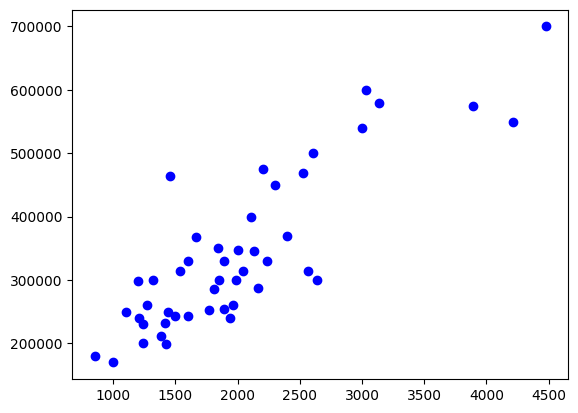

In [8]:
#简单看一下
plt.scatter(x, y, color='blue', label='实际数据')

In [23]:
import copy
import math


In [39]:
w_init = 0
b_init = 0
iterations=1000
tmp_alpha = 0.01
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0:Cost 6.43e+04 dj_dw: -1.058e+02,dj_db:-3.404e+02  w: 1.058e+00,b:3.40413e+00
Iteration  100:Cost 1.04e+04 dj_dw: -3.871e+01,dj_db:-1.246e+02  w: 6.744e+01,b:2.17057e+02
Iteration  200:Cost 3.18e+03 dj_dw: -1.417e+01,dj_db:-4.561e+01  w: 9.174e+01,b:2.95260e+02
Iteration  300:Cost 2.21e+03 dj_dw: -5.187e+00,dj_db:-1.669e+01  w: 1.006e+02,b:3.23885e+02
Iteration  400:Cost 2.08e+03 dj_dw: -1.899e+00,dj_db:-6.111e+00  w: 1.039e+02,b:3.34363e+02
Iteration  500:Cost 2.06e+03 dj_dw: -6.949e-01,dj_db:-2.237e+00  w: 1.051e+02,b:3.38198e+02
Iteration  600:Cost 2.06e+03 dj_dw: -2.544e-01,dj_db:-8.187e-01  w: 1.055e+02,b:3.39602e+02
Iteration  700:Cost 2.06e+03 dj_dw: -9.311e-02,dj_db:-2.997e-01  w: 1.057e+02,b:3.40116e+02
Iteration  800:Cost 2.06e+03 dj_dw: -3.408e-02,dj_db:-1.097e-01  w: 1.057e+02,b:3.40304e+02
Iteration  900:Cost 2.06e+03 dj_dw: -1.247e-02,dj_db:-4.015e-02  w: 1.058e+02,b:3.40373e+02
(w,b) found by gradient descent: (105.7596,340.3980)


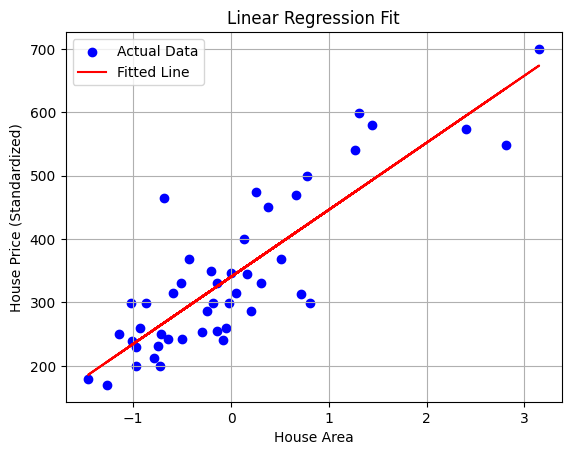

In [41]:
plt.scatter(x_train, y_train, color="blue", label="Actual Data")  # 实际数据点
plt.plot(x_train, w_final * x_train + b_final, color="red", label="Fitted Line")  # 拟合直线
plt.title("Linear Regression Fit")
plt.xlabel("House Area")
plt.ylabel("House Price (Standardized)")
plt.legend()
plt.grid(True)
plt.show()